<a href="https://colab.research.google.com/github/Ismat-Samadov/colab_notebooks/blob/main/image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Answer to Question 1: Computing and Plotting Image Histogram

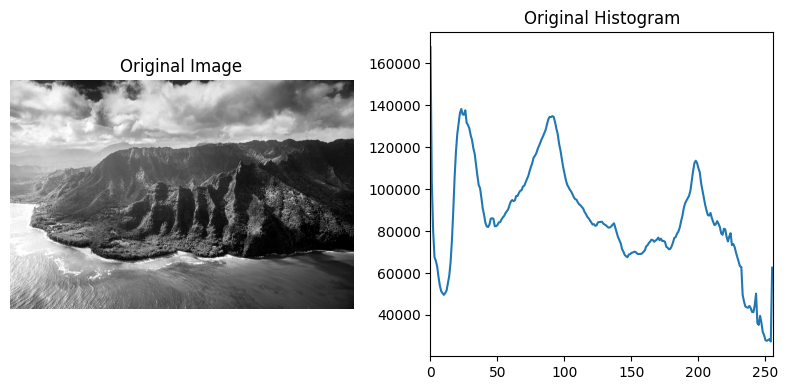

In [ ]:
import cv2  # opencv library for image processing
import numpy as np  # for numerical operations on arrays
import matplotlib.pyplot as plt  # for plotting and visualization

# function to display an image alongside its histogram
def plot_histogram(image, title):
    # calculate histogram using opencv - params: image, channel, mask, bins, range
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])

    # create a figure with specific size for better visibility
    plt.figure(figsize=(8, 4))

    # left subplot for the image
    plt.subplot(121)  # 1 row, 2 columns, 1st position
    plt.imshow(image, cmap='gray')  # display grayscale image
    plt.title(f'{title} Image')  # add descriptive title
    plt.axis('off')  # hide axis ticks for cleaner look

    # right subplot for the histogram
    plt.subplot(122)  # 1 row, 2 columns, 2nd position
    plt.plot(hist)  # plot histogram values
    plt.title(f'{title} Histogram')  # label the histogram
    plt.xlim([0, 256])  # set x-axis to cover all possible pixel values (0-255)
    plt.tight_layout()  # auto-adjust spacing between subplots
    plt.show()  # display the figure

# load our target image in grayscale mode - only need intensity values
img = cv2.imread('image_histogram.jpg', cv2.IMREAD_GRAYSCALE)

# show original image before any processing to see what we're working with
plot_histogram(img, 'Original')

## Answer to Question 2: Applying Histogram Equalization


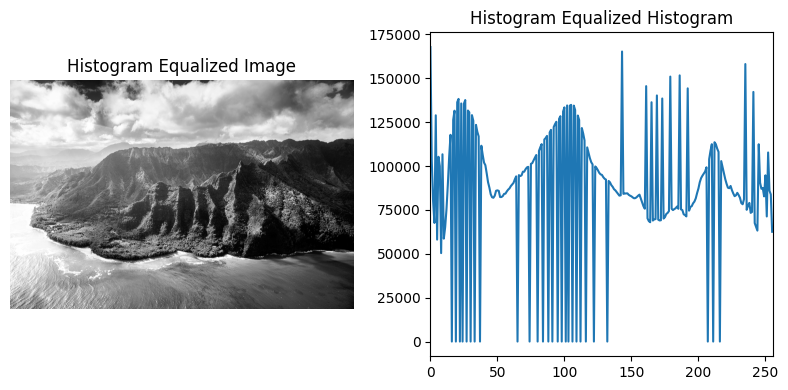

In [ ]:
# apply standard histogram equalization - simplest form of contrast enhancement
# this spreads out the most frequent intensity values across entire range (0-255)
img_eq = cv2.equalizeHist(img)
plot_histogram(img_eq, 'Histogram Equalized')

## Answer to Question 3: Implementing CLAHE and Comparison

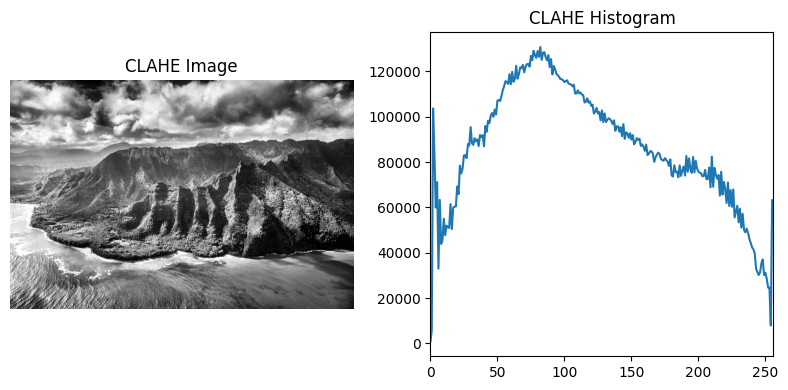

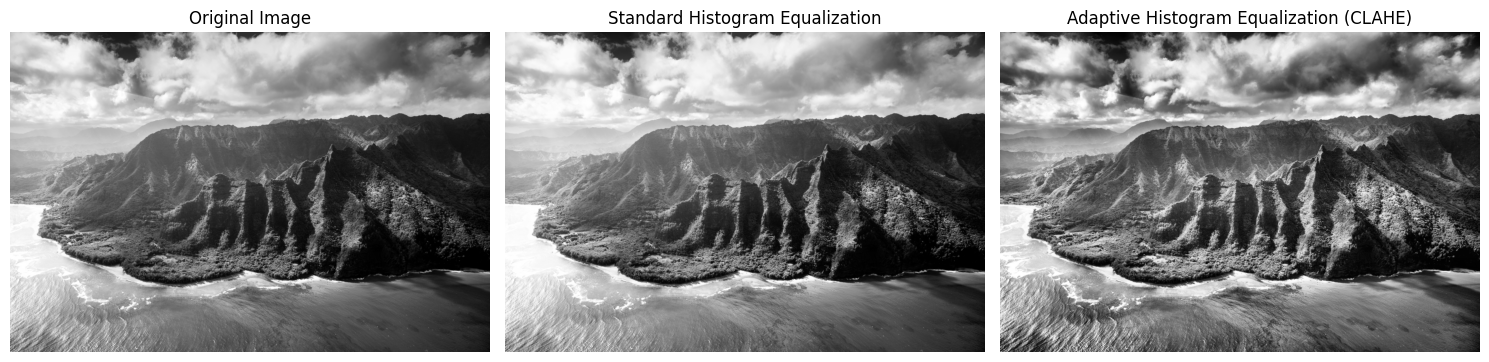

Original Image Statistics:
  Min: 0
  Max: 255
  Mean: 116.49
  Std Dev: 69.70

Histogram Equalized Image Statistics:
  Min: 0
  Max: 255
  Mean: 127.06
  Std Dev: 74.14

CLAHE Image Statistics:
  Min: 0
  Max: 255
  Mean: 117.58
  Std Dev: 64.94



In [ ]:
# create clahe object with custom parameters
# clipLimit=2.0 prevents over-amplification of contrast
# tileGridSize=(8,8) means image is divided into 8x8 tiles for local processing
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

# apply clahe to get adaptive equalization - better for preserving local details
img_clahe = clahe.apply(img)
plot_histogram(img_clahe, 'CLAHE')

# create bigger figure for side-by-side comparison of all three techniques
plt.figure(figsize=(15, 5))

# 1st image - original
plt.subplot(131)  # 1 row, 3 columns, 1st position
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# 2nd image - standard histogram equalization
plt.subplot(132)  # 1 row, 3 columns, 2nd position
plt.imshow(img_eq, cmap='gray')
plt.title('Standard Histogram Equalization')
plt.axis('off')

# 3rd image - clahe result
plt.subplot(133)  # 1 row, 3 columns, 3rd position
plt.imshow(img_clahe, cmap='gray')
plt.title('Adaptive Histogram Equalization (CLAHE)')
plt.axis('off')

# make sure everything fits nicely
plt.tight_layout()
plt.show()

# helper function to calculate and display basic statistical measures
def print_stats(image, name):
    print(f"{name} Statistics:")
    print(f"  Min: {np.min(image)}")  # darkest pixel value
    print(f"  Max: {np.max(image)}")  # brightest pixel value
    print(f"  Mean: {np.mean(image):.2f}")  # average brightness
    print(f"  Std Dev: {np.std(image):.2f}")  # measure of contrast
    print()  # empty line for readability

# compare stats to quantify the differences between methods
print_stats(img, "Original Image")
print_stats(img_eq, "Histogram Equalized Image")  # should have wider range
print_stats(img_clahe, "CLAHE Image")  # should have balanced local contrast

Interpretation of Image Enhancement Statistics

The statistics from all three image processing methods:
Original Image

Min: 0, Max: 255 - The image already uses the full range of possible pixel values
Mean: 116.49 - The average brightness is slightly below the middle of the range (127.5)
Std Dev: 69.70 - This indicates moderate contrast in the original image

Histogram Equalized Image

Min: 0, Max: 255 - Still using the full range (as expected)
Mean: 127.06 - The average has shifted closer to the middle of the range (127.5)
Std Dev: 74.14 - The standard deviation has increased, indicating enhanced contrast

CLAHE Image

Min: 0, Max: 255 - Also using the full range
Mean: 117.58 - Only slightly brighter than the original image
Std Dev: 64.94 - Interestingly, this is lower than both the original and histogram equalized images

What These Results Tell Us

Standard Histogram Equalization has produced the highest contrast (largest std dev) and most balanced brightness (mean closest to 127.5). This suggests it has successfully redistributed the pixel values more uniformly across the entire range.
CLAHE has actually reduced the overall contrast compared to both other versions (smallest std dev), but this doesn't necessarily mean worse quality. CLAHE works locally rather than globally, so it likely:

Enhanced contrast in local regions where needed
Reduced contrast in areas where it would amplify noise
Preserved more natural-looking textures and transitions


The similar means between the original (116.49) and CLAHE (117.58) images suggest CLAHE preserved the original brightness characteristics while making local adjustments, rather than forcing a global redistribution.

Practical Implications

If maximum contrast is desired across the entire image, standard histogram equalization performed better (higher std dev).
If natural-looking local details are more important, CLAHE likely produced better results despite the lower standard deviation.
The effectiveness of these methods depends on the specific image content - for example, CLAHE usually performs better on images with varying lighting conditions across different regions.